# Car Sales Prediction

##### This models uses varios features namely Manufacturer, Model, four_year_resale_value, Vehicle_type, Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity ,Fuel_efficiency, Latest_Launch, Power_perf_factor to predict the Sales of Cars 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
car_sales = pd.read_csv('C:/Users/Shadab/Downloads/car_sales.csv')

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [5]:
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [7]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [8]:
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object']]


In [15]:
num_var=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in['float64','int64']]

In [16]:
[key for key in dict(car_sales.dtypes)]


['Manufacturer',
 'Model',
 'Sales_in_thousands',
 'four_year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Latest_Launch',
 'Power_perf_factor']

In [12]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [17]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [18]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [19]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=car_sales_num.apply(lambda x: var_summary(x)).T

In [19]:
num_summary.to_csv('num_summary.csv')

In [20]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [21]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(lambda x: cat_summary(x))

In [22]:
cat_summary

,Manufacturer,Model,Vehicle_type,Latest_Launch
N,157,157,157,157
NMISS,0,0,0,0
ColumnsNames,Dodge 11 Ford 11 Chevrolet ...,Neon 2 Camry 1 Camaro...,Passenger 116 Car 41 Name: Vehicl...,5/6/2011 2 8/27/2011 2 7/22/2012 ...


In [23]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(car_sales)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Date,0
Text (Unique),0
Rejected,2
Distinct count,148


In [26]:
car_sales.clip_upper?

In [28]:
#Handling Outliers - Method1
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_upper(car_sales['Sales_in_thousands'].quantile(0.99)) 
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_lower(car_sales['Sales_in_thousands'].quantile(0.01)) 


In [29]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,0.937280,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,253.560581,260.645320
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.173000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.231440,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.555000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.400000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.875000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.085000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.915000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.245400,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [24]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

car_sales_num=car_sales_num.apply(lambda x: outlier_capping(x))

In [25]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,253.560581,260.645320
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,96.40000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


In [25]:
#Handling Missings
# Fill with mean
car_sales['Sales_in_thousands']=car_sales['Sales_in_thousands'].fillna(car_sales['Sales_in_thousands'].mean())

In [26]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8011.378448,51.027888,29.450000,57.397478,3294.470497,0.946643,0.950763,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,250.443296,253.560581
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.173000,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.231440,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.555000,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,96.400000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.875000,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.085000,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.915000,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.245400,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.900000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


In [26]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [27]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,253.560581,260.645320
four_year_resale_value,157.0,0.0,2690.901000,17.139497,14.180000,9.939494,98.793544,6.17300,6.874120,8.425000,9.710000,12.545000,14.180000,18.140000,27.02500,39.275000,59.312800,60.220000
Price_in_thousands,157.0,0.0,4281.553480,27.271041,22.799000,13.982815,195.519110,10.23144,10.485434,12.491000,13.976200,18.145000,22.799000,31.930000,43.78800,55.225000,76.514312,78.479800
Engine_size,157.0,0.0,478.810000,3.049745,3.000000,0.979133,0.958702,1.55500,1.580200,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29087.800000,185.272611,177.500000,52.650616,2772.087354,96.40000,98.416000,114.600000,120.000000,150.000000,177.500000,215.000000,253.80000,300.000000,316.930000,325.750000
Wheelbase,157.0,0.0,16867.100000,107.433758,107.000000,7.400543,54.768036,92.87500,93.001000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,132.485000,134.375000
Width,157.0,0.0,11173.000000,71.165605,70.550000,3.379817,11.423163,66.08500,66.261400,66.500000,66.900000,68.400000,70.550000,73.400000,76.18000,78.200000,79.139600,79.190000
Length,157.0,0.0,29411.840000,187.336561,187.900000,13.078309,171.042158,154.91500,156.250600,163.700000,173.120000,177.600000,187.900000,196.100000,203.34000,208.500000,217.062200,219.305000
Curb_weight,157.0,0.0,530.454160,3.378689,3.342000,0.617780,0.381652,2.24540,2.247976,2.424000,2.612800,2.975000,3.342000,3.778000,4.11740,4.388400,5.394619,5.396680
Fuel_capacity,157.0,0.0,2817.100000,17.943312,17.200000,3.808060,14.501317,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.396000,30.900000


In [32]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [40]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')


In [41]:
col_dummies
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
car_sales_cat = pd.concat([car_sales['Vehicle_type'], col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [28]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [44]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [29]:
#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [30]:
car_sales_cat.head(5)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#car_sales=pd.concat(car_sales_num, car_sales_cat)
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

In [32]:
car_sales_new.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


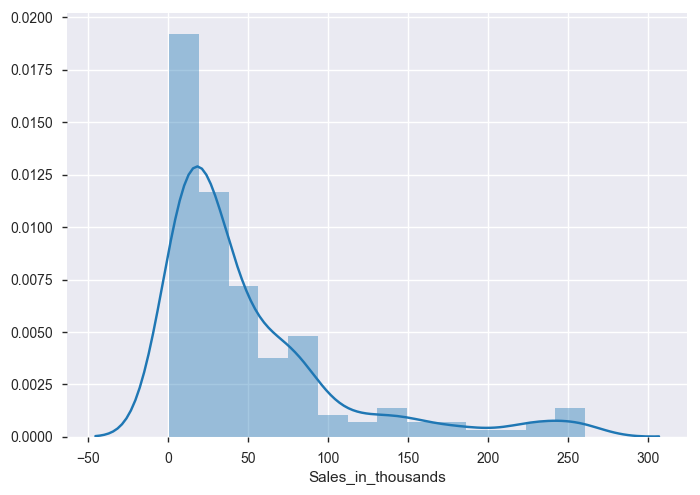

In [33]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

The distribution is clearly skewed. We will have to transform it to normal

In [34]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"]+1)

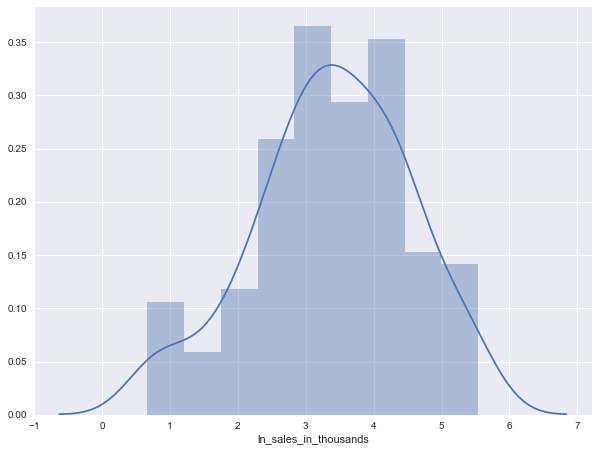

In [40]:
sns.distplot(car_sales_new.ln_sales_in_thousands)

The independent variable now follows somewhat normal distribution

In [35]:

car_sales_new=car_sales_new.drop(['Sales_in_thousands'],axis=1)

In [36]:
car_sales_new.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_s

In [37]:
# correlation matrix (ranges from 1 to -1)
car_sales_new.corr()

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
four_year_resale_value,1.000000,0.793482,0.433034,0.650285,-0.040888,0.165259,0.040030,0.276207,0.268711,-0.341003,...,-0.065511,0.517804,-0.033931,-0.097963,-0.033931,-0.018848,-0.056776,-0.059543,0.084599,-0.437248
Price_in_thousands,0.793482,1.000000,0.617601,0.847967,0.118272,0.328579,0.157225,0.526211,0.431413,-0.507150,...,-0.061809,0.352504,0.019062,-0.169161,-0.047888,-0.093559,-0.136904,0.052376,0.044229,-0.566011
Engine_size,0.433034,0.617601,1.000000,0.814995,0.518433,0.702596,0.576364,0.793321,0.698313,-0.757120,...,0.078343,0.016720,-0.104716,-0.191354,-0.063982,-0.108018,-0.221204,-0.153125,-0.278720,-0.109700
Horsepower,0.650285,0.847967,0.814995,1.000000,0.325276,0.538193,0.420399,0.637164,0.526638,-0.610719,...,-0.001035,0.231530,-0.016823,-0.226951,-0.043878,-0.115615,-0.244750,-0.011797,-0.010312,-0.393374
Wheelbase,-0.040888,0.118272,0.518433,0.325276,1.000000,0.681390,0.837535,0.656884,0.659692,-0.498976,...,0.046376,-0.260791,-0.045175,-0.083439,-0.092140,-0.093985,-0.203574,-0.085580,-0.382446,0.269422
Width,0.165259,0.328579,0.702596,0.538193,0.681390,1.000000,0.700024,0.710129,0.648637,-0.584584,...,0.042466,-0.060717,-0.073017,-0.200565,-0.110105,-0.115409,-0.187300,-0.094605,-0.239476,0.044473
Length,0.040030,0.157225,0.576364,0.420399,0.837535,0.700024,1.000000,0.622352,0.561758,-0.418688,...,0.096536,-0.149922,-0.014260,-0.061445,-0.059569,-0.103678,-0.304586,-0.059173,-0.130166,0.207925
Curb_weight,0.276207,0.526211,0.793321,0.637164,0.656884,0.710129,0.622352,1.000000,0.868023,-0.829389,...,0.007816,-0.094518,-0.044951,-0.221330,-0.020049,-0.070576,-0.161803,-0.030435,-0.518975,-0.056227
Fuel_capacity,0.268711,0.431413,0.698313,0.526638,0.659692,0.648637,0.561758,0.868023,1.000000,-0.821330,...,-0.001399,-0.034685,-0.007281,-0.260082,-0.046183,-0.011476,-0.170318,-0.005775,-0.592574,-0.018434
Fuel_efficiency,-0.341003,-0.507150,-0.757120,-0.610719,-0.498976,-0.584584,-0.418688,-0.829389,-0.821330,1.000000,...,0.053712,-0.062668,-0.022199,0.304881,0.021007,0.090764,0.121107,0.036863,0.597855,0.128691


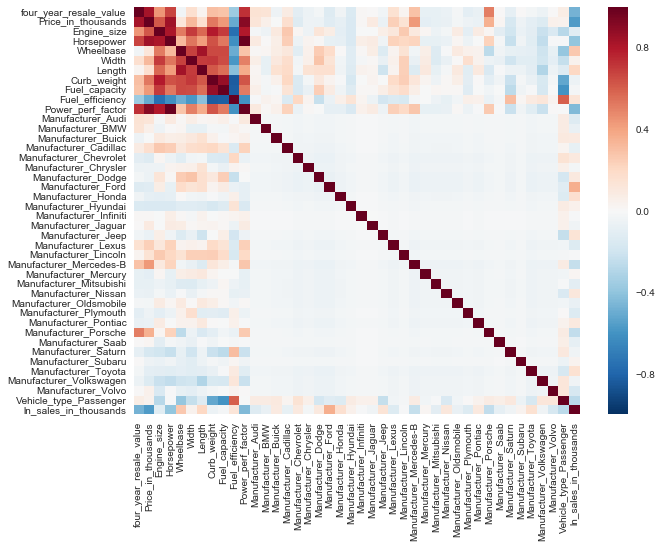

In [44]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

Power_perf_factor is highly correlated with Horsepower and should be ignored for analysis

Price_in_thousands is highly correlated with four_year_resale_value and should be ignored for analysis

In [39]:
car_sales_new.drop(['Power_perf_factor','Price_in_thousands'],axis=1,inplace=True)

#### What relationships do you notice?

In [40]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands'] )
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Wheelbase', 'Width',
       'four_year_resale_value'],
      dtype='object')

In [41]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [43]:
print (len( train_X ))
print (len( test_X))

109
48


## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

## Method-1

In [44]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [45]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [46]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.751
Model:                               OLS   Adj. R-squared:                  0.621
Method:                    Least Squares   F-statistic:                     5.783
Date:                   Tue, 05 Jun 2018   Prob (F-statistic):           1.37e-10
Time:                           18:43:44   Log-Likelihood:                -96.723
No. Observations:                    109   AIC:                             269.4
Df Residuals:                         71   BIC:                             371.7
Df Model:                             37                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [47]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const                     -6.630622e+00
Curb_weight                5.843293e-01
Engine_size                2.356854e-01
Fuel_capacity             -1.495241e-01
Fuel_efficiency            1.434832e-01
Horsepower                -6.099387e-03
Length                     1.326786e-02
Manufacturer_Audi         -4.228459e-01
Manufacturer_BMW           2.744488e-01
Manufacturer_Buick         8.100394e-01
Manufacturer_Cadillac      5.037574e-01
Manufacturer_Chevrolet     4.715322e-01
Manufacturer_Chrysler      8.242822e-02
Manufacturer_Dodge         1.235725e+00
Manufacturer_Ford          1.629048e+00
Manufacturer_Honda         1.863560e+00
Manufacturer_Hyundai       1.083817e+00
Manufacturer_Infiniti     -4.426057e-16
Manufacturer_Jaguar        3.375165e-01
Manufacturer_Jeep          2.672747e+00
Manufacturer_Lexus         8.324921e-01
Manufacturer_Lincoln       6.064094e-01
Manufacturer_Mercedes-B    1.974198e-03
Manufacturer_Mercury       4.730831e-01
Manufacturer_Mitsubishi    

In [52]:
from sklearn import metrics
import numpy as np
y_pred_train=lm.predict(train_X)

print ('MAE:', metrics.mean_absolute_error(train_y, y_pred_train))
print ('MSE:', metrics.mean_squared_error(train_y, y_pred_train))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_train)))

MAE: 0.489819506727
MSE: 0.345371250603
RMSE: 0.587682950751


In [56]:
#from sklearn.utils import check_arrays
def MAPE(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print ('MAPE:',MAPE(test_y,y_pred_test))

MAE: 0.799480600289
MSE: 0.951117416833
RMSE: 0.97525248876
MAPE: 33.59330168816445
